<a href="https://colab.research.google.com/github/sahiltambe18/ML_notebooks/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [ ]:
df = pd.read_csv('/content/Admission_Predict - Admission_Predict.csv')

In [ ]:

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

preprocessing

In [ ]:
df.drop('Serial No.',axis=1,inplace=True)
df.drop('SOP',axis=1,inplace=True)
df

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,9.65,1,0.92
1,324,107,4,4.5,8.87,1,0.76
2,316,104,3,3.5,8.00,1,0.72
3,322,110,3,2.5,8.67,1,0.80
4,314,103,2,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,9.04,1,0.82
396,325,107,3,3.5,9.11,1,0.84
397,330,116,4,4.5,9.45,1,0.91
398,312,103,3,4.0,8.78,0,0.67


In [ ]:
df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.660123,0.746479,0.447783,0.711250
LOR,0.557555,0.567721,0.660123,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.669889,0.873289,0.553202,1.000000


<Axes: >

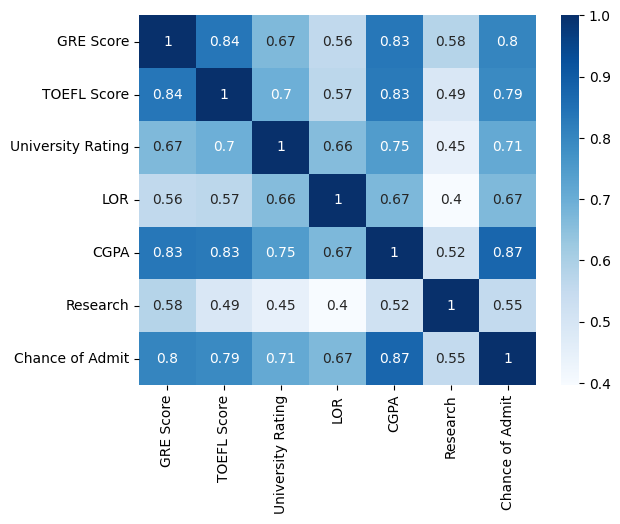

In [ ]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Text(0, 0.5, 'cgpa')

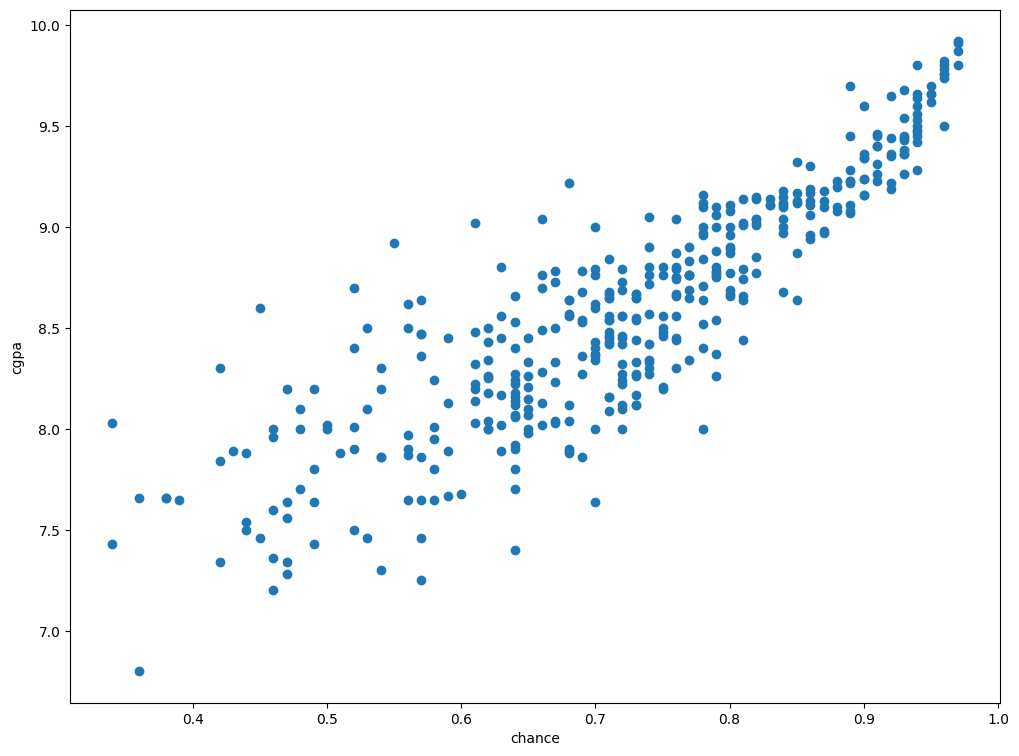

In [ ]:
plt.subplots(figsize=(12,9))
plt.scatter(df['Chance of Admit'],df['CGPA'])
plt.xlabel("chance")
plt.ylabel("cgpa")

<Axes: xlabel='Chance of Admit', ylabel='CGPA'>

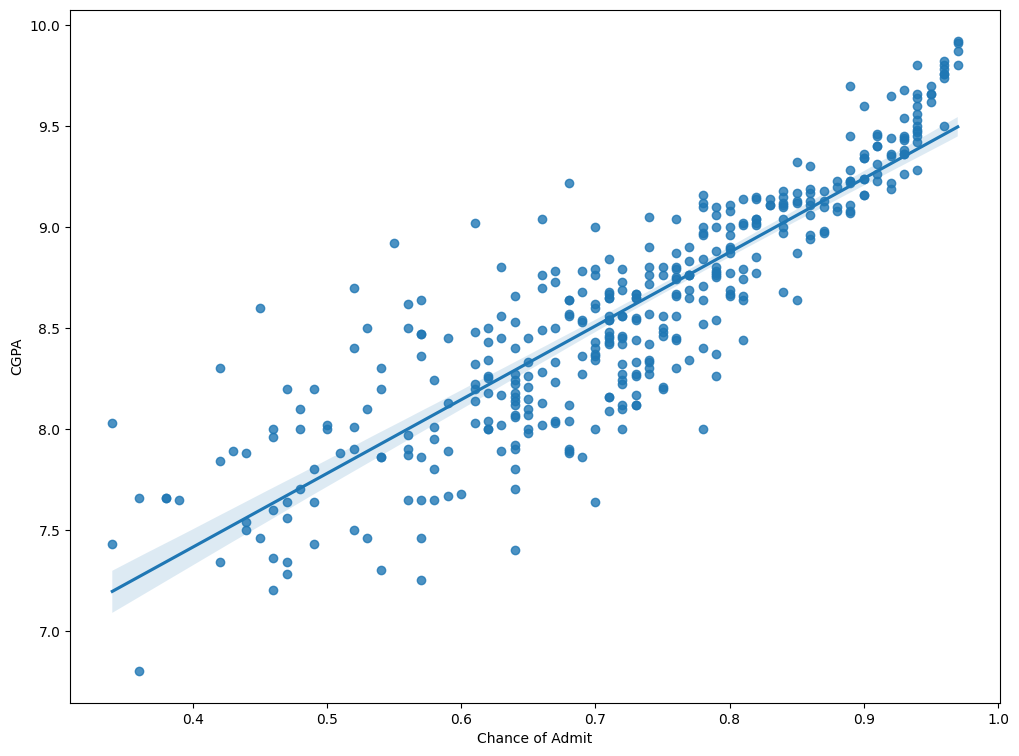

In [ ]:
plt.subplots(figsize=(12,9))
sns.regplot(data=df , x=df['Chance of Admit'] , y=df['CGPA'])

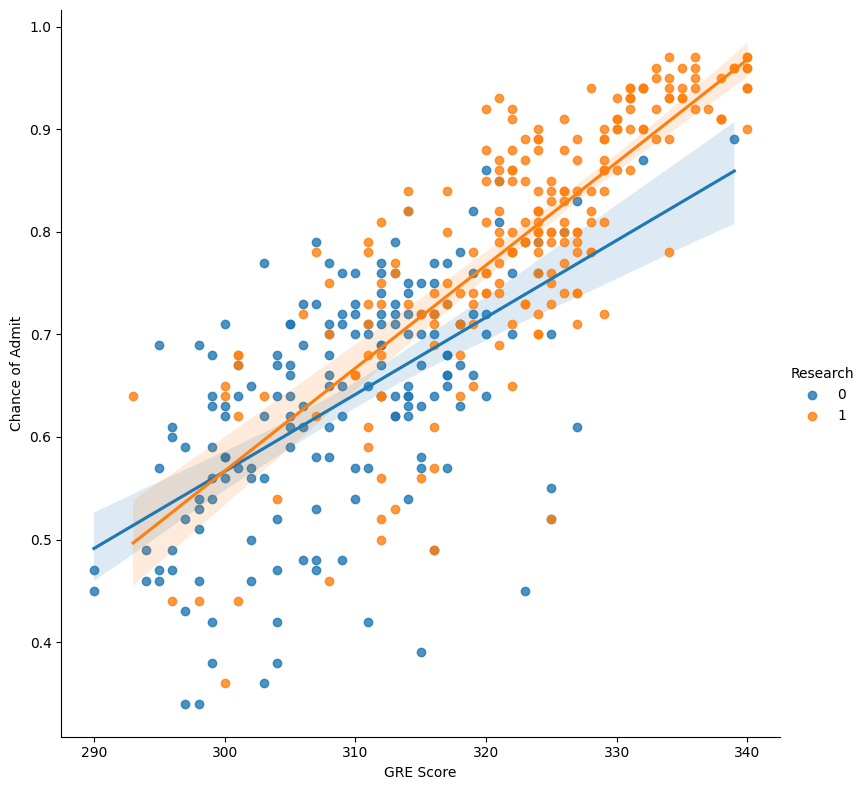

In [ ]:
# plt.subplots(figsize=(12,9))
# sns.lmplot(data=df , x='Chance of Admit',y='CGPA',hue='Research')
sns.lmplot(x="GRE Score", y="Chance of Admit", data=df, hue="Research",height= 8)

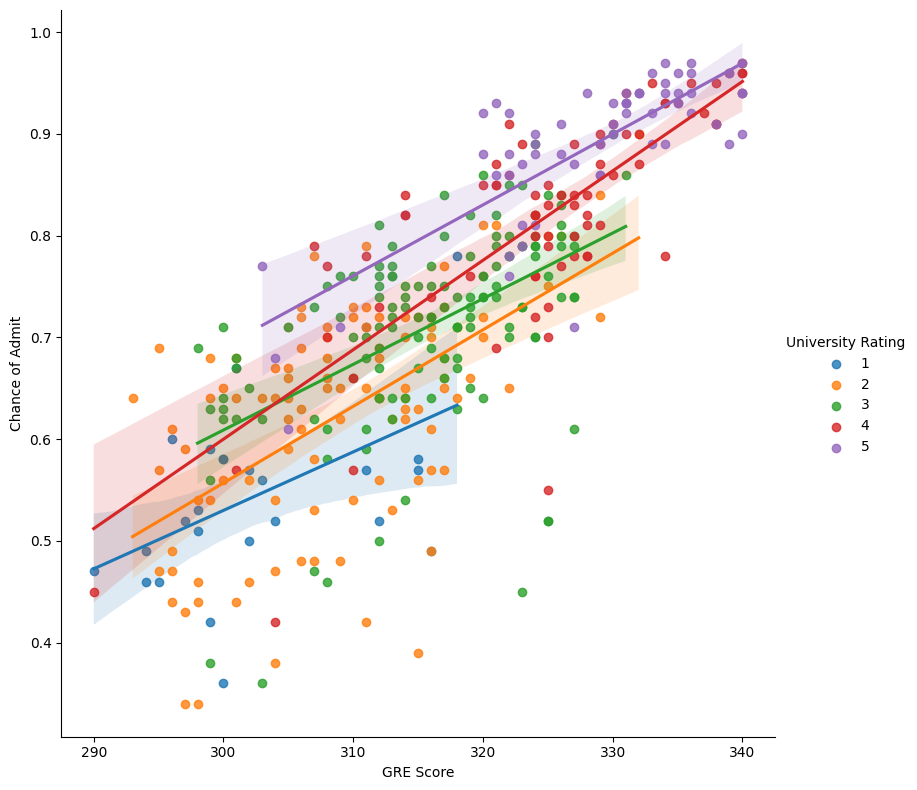

In [ ]:
sns.lmplot(x="GRE Score", y="Chance of Admit", data=df, hue="University Rating",height=8)

In [ ]:
admit_high_chance= df[df["Chance of Admit"]>=0.8]
admit_high_chance.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          128 non-null    int64  
 1   TOEFL Score        128 non-null    int64  
 2   University Rating  128 non-null    int64  
 3   LOR                128 non-null    float64
 4   CGPA               128 non-null    float64
 5   Research           128 non-null    int64  
 6   Chance of Admit    128 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 8.0 KB


In [ ]:
admit_high_chance.corr()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.722463,0.358013,0.246629,0.754434,0.167532,0.716187
TOEFL Score,0.722463,1.000000,0.274811,0.302047,0.648308,0.083921,0.673774
University Rating,0.358013,0.274811,1.000000,0.531448,0.479284,0.190083,0.584556
LOR,0.246629,0.302047,0.531448,1.000000,0.441634,0.050772,0.488480
CGPA,0.754434,0.648308,0.479284,0.441634,1.000000,0.158186,0.871533
Research,0.167532,0.083921,0.190083,0.050772,0.158186,1.000000,0.226028
Chance of Admit,0.716187,0.673774,0.584556,0.488480,0.871533,0.226028,1.000000


<ipython-input-42-861bd2b3f918>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( admit_high_chance["GRE Score"])


<Axes: xlabel='GRE Score', ylabel='Density'>

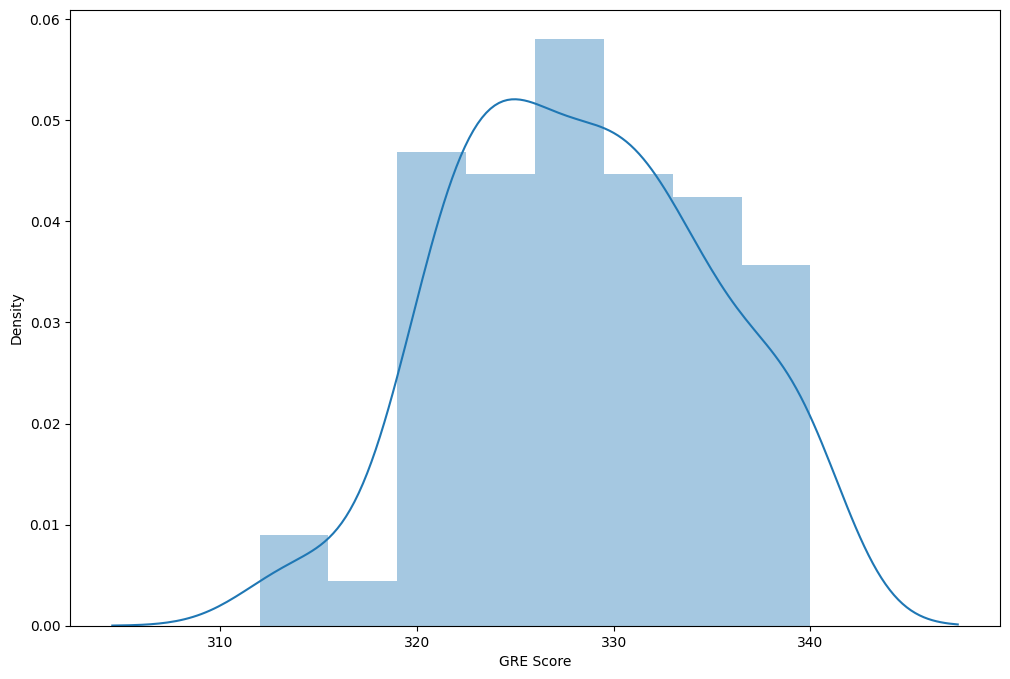

In [ ]:
plt.subplots(figsize=(12,8))
# sns.set_theme(style="darkgrid")
sns.distplot( admit_high_chance["GRE Score"])

gre score in betn 0-1

In [ ]:
X = df['GRE Score'].values
X= X/340

In [ ]:
y = df['Chance of Admit'].values

In [ ]:
from sklearn.model_selection import train_test_split as tts

xtr , xts , ytr ,yts = tts(X ,y ,test_size=0.25)

# **Linear Regressor**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(xtr.reshape(-1,1), ytr)

LinearRegression()

In [ ]:
ypr = lr.predict(xts.reshape(-1,1))

lr.score(xts.reshape(-1,1),yts.reshape(-1,1))

0.5797354932158114

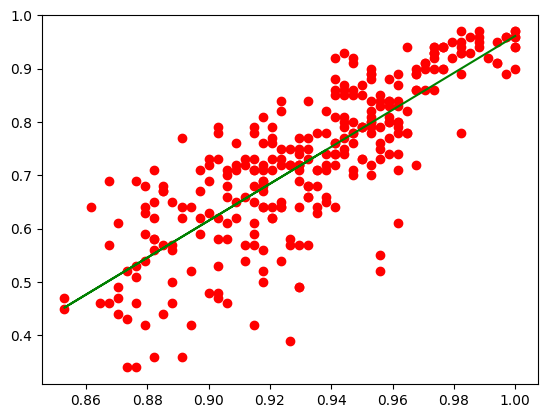

In [ ]:
plt.scatter(xtr,ytr, color = "red")
plt.plot(xtr, lr.predict(xtr.reshape(-1,1)), color = "green")

In [ ]:
test= 320
val= test/340
val_out=lr.predict(np.array([[val]]))
val_out

array([0.75777062])

## **Random Forest**

In [ ]:
x = df.drop(['Chance of Admit'],axis=1)
y = df['Chance of Admit']

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

xtr , xts , ytr , yts = tts(x,y,test_size=0.3)

In [ ]:
rf.fit(xtr,ytr)
rf.score(xts,yts)

0.7462096300325949

In [ ]:
res = rf.predict([[320,115,4,4,9.5,1]])
# 75%	325.000000	112.000000	4.000000	4.000000	9.062500	1.000000	0.83000

print("chance are : ",res[0]*100)

chance are :  91.88000000000005


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **decision tree**

In [ ]:
df['Chance of Admit'] = [1 if each >=0.75 else 0 for each in df['Chance of Admit'] ]
df

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,9.65,1,1
1,324,107,4,4.5,8.87,1,1
2,316,104,3,3.5,8.00,1,0
3,322,110,3,2.5,8.67,1,1
4,314,103,2,3.0,8.21,0,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,9.04,1,1
396,325,107,3,3.5,9.11,1,1
397,330,116,4,4.5,9.45,1,1
398,312,103,3,4.0,8.78,0,0


In [ ]:
x = df[['GRE Score','CGPA','TOEFL Score','University Rating','Research']]
y = df[['Chance of Admit']]

In [ ]:
xtr , xts , ytr ,yts = tts(x,y,test_size=0.25)
print(xtr.shape)
print(ytr.shape)
print(xts.shape)
print(yts.shape)

(300, 5)
(300, 1)
(100, 5)
(100, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression



In [ ]:
rf = RandomForestRegressor()

dt = DecisionTreeRegressor()

lr = LogisticRegression()

In [ ]:
rf.fit(xtr,ytr)

<ipython-input-61-0e961e36c1ae>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)


RandomForestRegressor()

In [ ]:
dt.fit(xtr,ytr)

lr.fit(xtr,ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred_rf = rf.predict(xts)

ypred_rf = [1 if each > 0.75 else 0 for each in ypred_rf]

print(yts.shape)
# print(ypred_rf.shape)

res = pd.DataFrame({
    "actual": yts.values.ravel(),  # Flattening to convert the 2D array to 1D
    "pred": ypred_rf
})


(100, 1)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

ypred_dt = dt.predict(xts)

ypred_lr = lr.predict(xts)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        50
           1       0.85      0.78      0.81        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



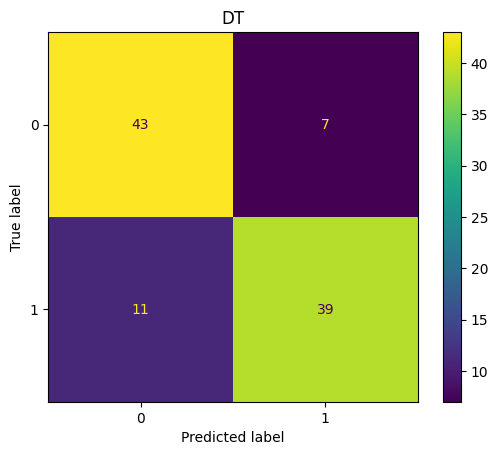

In [ ]:
ConfusionMatrixDisplay.from_predictions(yts,ypred_dt)
plt.title('DT')
plt.show
print(classification_report(yts,ypred_dt))

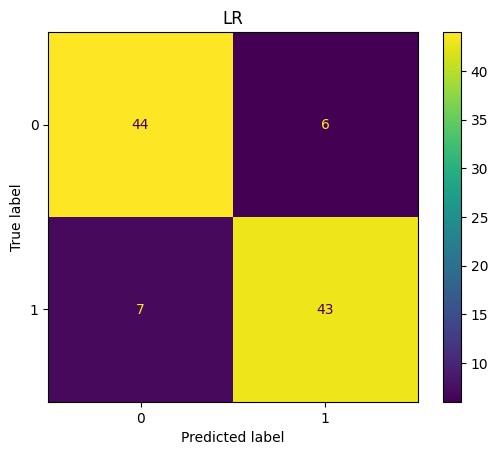

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.88      0.86      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [ ]:
ConfusionMatrixDisplay.from_predictions(yts,ypred_lr)
plt.title("LR")
plt.show()
print(classification_report(yts,ypred_lr))

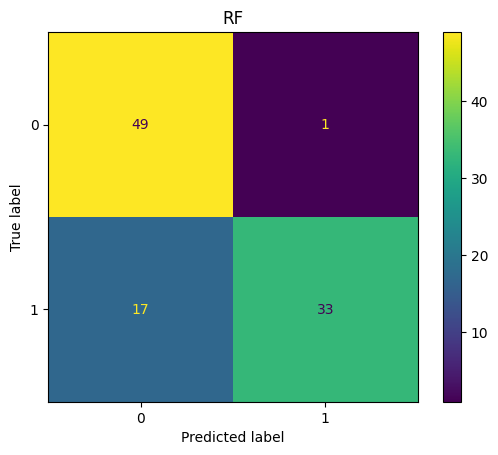

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        50
           1       0.97      0.66      0.79        50

    accuracy                           0.82       100
   macro avg       0.86      0.82      0.82       100
weighted avg       0.86      0.82      0.82       100



In [ ]:
ConfusionMatrixDisplay.from_predictions(yts,ypred_rf)
plt.title("RF")
plt.show()
print(classification_report(yts,ypred_rf))